<a href="https://colab.research.google.com/github/ArwaAlbassam/Bootcamp-T5-_Arwa/blob/main/Project1_ArwaAlBassam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Find the stations most crowded to set up the centers of COVID-19 vaccine**

# **Import packages**

In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Load dataset**

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828, 210904]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,00:00:00,REGULAR,7579078,2590451
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,04:00:00,REGULAR,7579084,2590452
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493


In [20]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749154 entries, 0 to 209734
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 251.7+ MB


In [21]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.749154e+06,2.749154e+06
mean,4.178346e+07,3.339163e+07
std,2.190244e+08,1.922281e+08
min,0.000000e+00,0.000000e+00
25%,2.170572e+05,1.003570e+05
50%,1.405376e+06,8.626650e+05
75%,5.992651e+06,3.971806e+06
max,2.147417e+09,2.133797e+09


In [22]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [23]:
turnstile = ['C/A',
       'UNIT',
       'SCP',
       'STATION',
       'LINENAME']

# **Pre-Processing**

Removing whitespace

In [24]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

Missing values:

In [25]:
turnstiles_df.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209730,False,False,False,False,False,False,False,False,False,False,False
209731,False,False,False,False,False,False,False,False,False,False,False
209732,False,False,False,False,False,False,False,False,False,False,False
209733,False,False,False,False,False,False,False,False,False,False,False


In [26]:
print("Check if there are any missing values in Dataset ")
print(turnstiles_df.isnull().sum())

Check if there are any missing values in Dataset 
C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64


Duplicate:

In [27]:
print("Check if there are any duplicated values in dataset: \n")
dubl=turnstiles_df.duplicated()
print('number of duplicate = %d\n'%(dubl.sum()))

Check if there are any duplicated values in dataset: 

number of duplicate = 0



**Calculate the Traffic**

Derived DATETIME column from 'DATE' and 'TIME' columns:

In [28]:
turnstiles_df['DATETIME'] =pd.to_datetime(turnstiles_df.DATE +' '+ turnstiles_df.TIME, 
                    format='%m/%d/%Y %H:%M:%S')

turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00


Change dtypes of ENTRIES and EXITS columns

In [29]:
turnstiles_df['ENTRIES'] = turnstiles_df.ENTRIES.astype("int")
turnstiles_df['EXITS'] = turnstiles_df.EXITS.astype("int")

Remove non-REGULAR values from DESC column

In [30]:
turnstiles_df = turnstiles_df.drop(turnstiles_df.loc[turnstiles_df.DESC != 'REGULAR'].index)

In [31]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00


Check the duplicates turnstile for a given datetime

In [37]:
(turnstiles_df
.groupby(['C/A','UNIT','SCP','STATION','DATETIME'])
.ENTRIES.count()
.reset_index()
.sort_values('ENTRIES', ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1832762,R134,R272,01-00-03,28 ST,2021-06-04 21:00:00,1
1832764,R134,R272,01-00-03,28 ST,2021-06-05 13:00:00,1
1832765,R134,R272,01-00-03,28 ST,2021-06-05 17:00:00,1
1832766,R134,R272,01-00-03,28 ST,2021-06-05 21:00:00,1


In [38]:
turnstiles_df.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME'],
                      inplace=True, ascending=True)

Create 3 columns:
1-previous datetime
2-previous entries
3-previous exits 

In [39]:
turnstiles_df[['PREV_DATETIME', "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df
                                                .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])\
                                                       ['DATETIME','ENTRIES','EXITS']
                                                .apply(lambda grp: grp.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Check null values after create 3 cloumns 

In [40]:
print(turnstiles_df.isnull().sum())

C/A                 0
UNIT                0
SCP                 0
STATION             0
LINENAME            0
DIVISION            0
DATE                0
TIME                0
DESC                0
ENTRIES             0
EXITS               0
DATETIME            0
PREV_DATETIME    5028
PREV_ENTRIES     5028
PREV_EXITS       5028
dtype: int64


Drop null values

In [41]:
turnstiles_df.dropna( axis=0, inplace=True)

Functions to count the daily entries

In [45]:
def daily_entries(row, max_count):
    count = row["ENTRIES"] - row["PREV_ENTRIES"]
    if count < 0:
        count = -count
    if count > max_count:
        count = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if count > max_count:
        return 0
    return count

Functions to count the daily exits

In [44]:
def daily_exits(row, max_count):
    countx = row["EXITS"] - row["PREV_EXITS"]
    if countx < 0:
        countx = -countx
    if countx > max_count:
        countx = min(row["EXITS"], row["PREV_EXITS"])
    if countx > max_count:
        return 0
    return countx

If the count more than 1M, then the counter might have been reset!


In [47]:
turnstiles_df["TOTAL_ENTRIES"] = turnstiles_df.apply(daily_entries, axis=1, max_count=100000)
turnstiles_df["TOTAL_EXITS"] = turnstiles_df.apply(daily_exits, axis=1, max_count=100000)

Total of entries and exits (Traffic)

In [48]:
turnstiles_df["TOTAL_TRAFFIC"] = turnstiles_df["TOTAL_EXITS"] + turnstiles_df["TOTAL_ENTRIES"]

In [49]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,PREV_DATETIME,PREV_ENTRIES,PREV_EXITS,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,2021-05-29 00:00:00,7578734.0,2590325.0,6.0,2.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,2021-05-29 04:00:00,7578740.0,2590327.0,9.0,13.0,22.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,2021-05-29 08:00:00,7578749.0,2590340.0,40.0,46.0,86.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,2021-05-29 12:00:00,7578789.0,2590386.0,108.0,32.0,140.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,2021-05-29 16:00:00,7578897.0,2590418.0,124.0,21.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209730,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638,2021-09-03 05:00:00,2021-09-03 01:00:00,5554.0,638.0,0.0,0.0,0.0
209731,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638,2021-09-03 09:00:00,2021-09-03 05:00:00,5554.0,638.0,0.0,0.0,0.0
209732,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638,2021-09-03 13:00:00,2021-09-03 09:00:00,5554.0,638.0,0.0,0.0,0.0
209733,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638,2021-09-03 17:00:00,2021-09-03 13:00:00,5554.0,638.0,0.0,0.0,0.0


# **Top 3 stations are more crowded**

Find station_daily for each station daily and TOTAL TRAFFIC

In [50]:
station_daily = turnstiles_df.groupby(["STATION","DATE"])[['TOTAL_TRAFFIC']].sum().reset_index()
station_daily.head()

,STATION,DATE,TOTAL_TRAFFIC
0,1 AV,05/29/2021,11578.0
1,1 AV,05/30/2021,13397.0
2,1 AV,05/31/2021,12571.0
3,1 AV,06/01/2021,19325.0
4,1 AV,06/02/2021,22386.0


Find the sum TOTAL TRAFFIC for each station

In [51]:
stations_total = station_daily.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

stations_total.head(11)

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,9963486.0
1,34 ST-HERALD SQ,7669095.0
2,GRD CNTRL-42 ST,7495832.0
3,86 ST,6612764.0
4,42 ST-PORT AUTH,6469142.0
5,14 ST-UNION SQ,6421036.0
6,23 ST,6011473.0
7,125 ST,5872244.0
8,TIMES SQ-42 ST,5655788.0
9,FULTON ST,5171987.0


Using the mean to find the top three stations 

In [52]:
station_avg = station_daily.groupby('STATION').mean().round(0)\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, ' Average Traffic')

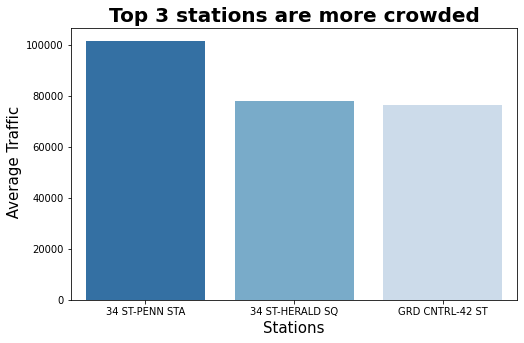

In [77]:
top_five_stations_avg_daily = station_avg[:3]
plt.figure(figsize=[8,5])
palette = sns.color_palette("Blues_r",n_colors=3)

ax = sns.barplot('STATION', 'TOTAL_TRAFFIC', data=top_five_stations_avg_daily, palette=palette)

plt.title('Top 3 stations are more crowded', size=20, weight='bold')
plt.xlabel("Stations", size=15)
plt.ylabel(" Average Traffic", size=15)

